## Day 1: Data in Time Series Workshop

#### E-bay Data Set

In [19]:
import pandas as pd

In [20]:
ebay_df = pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/TimeSeries/master/ebay9899.csv")
ebay_df.head()

,OpeningPrice,DailyHigh,DailyLow,ClosingPrice,Volume,DATE
0,17.8333,18.0833,14.7500,15.7917,9095400.0,1998-09-24
1,15.1667,15.3750,13.7083,14.9583,2126400.0,1998-09-25
2,15.8333,16.9583,15.3333,16.0833,1574300.0,1998-09-28
3,16.4583,16.7500,15.9167,16.2917,689000.0,1998-09-29
4,15.7292,16.0000,14.4167,15.0208,773600.0,1998-09-30


In [21]:
ebay_df.describe()

,OpeningPrice,DailyHigh,DailyLow,ClosingPrice,Volume
count,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,116.096035,121.020089,111.480255,116.201909,3.704075e+06
std,51.509314,53.116499,49.577316,51.321967,2.787277e+06
min,9.291700,9.750000,8.416700,9.666700,2.706000e+05
25%,78.750025,82.249975,75.312500,78.593775,1.703000e+06
50%,132.500000,134.906250,127.531000,132.187500,2.926450e+06
75%,152.812500,157.547000,146.703125,152.000000,5.087750e+06
max,233.875000,234.000000,203.125000,215.000000,1.515880e+07


In [22]:
ebay_df.dtypes

OpeningPrice    float64
DailyHigh       float64
DailyLow        float64
ClosingPrice    float64
Volume          float64
DATE             object
dtype: object

## Airline Passengers Data Set

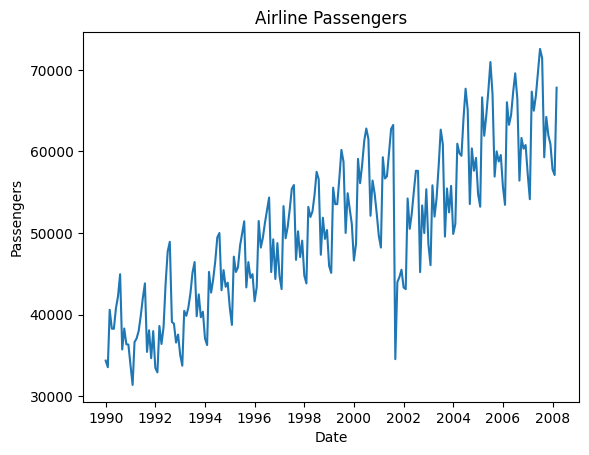

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

from statsforecast import StatsForecast

usair_p=pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/TimeSeries/master/usairlines.csv")
df=pd.date_range(start='1/1/1990', end='3/1/2008', freq='MS')
usair_p.index=pd.to_datetime(df)



plt.plot(usair_p["Passengers"])
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.title("Airline Passengers")
plt.show()

In [24]:
usair_p.head(20)

,Year,Month,Passengers
1990-01-01,1990,1,34348
1990-02-01,1990,2,33536
1990-03-01,1990,3,40578
1990-04-01,1990,4,38267
1990-05-01,1990,5,38249
1990-06-01,1990,6,40792
1990-07-01,1990,7,42225
1990-08-01,1990,8,44943
1990-09-01,1990,9,35708
1990-10-01,1990,10,38286


#### Gaps in Python

In [25]:
full_date_range = pd.date_range(start = usair_p.index.min(), end = usair_p.index.max(), freq = 'MS')

gaps = full_date_range.difference(usair_p.index)

if not gaps.empty:
    print(f"Missing dates:\n{gaps}")
else:
    print("No missing dates found.")


No missing dates found.


### Energy Data Set

In [26]:
energy = pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/TimeSeries/master/energy_F2024.csv")
energy.head(25)

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,8/1/2018 4:00,8/1/2018 0:00,RFC,WEST,AEP,AEPAPT,4050.612,True
1,8/1/2018 5:00,8/1/2018 1:00,RFC,WEST,AEP,AEPAPT,3855.341,True
2,8/1/2018 6:00,8/1/2018 2:00,RFC,WEST,AEP,AEPAPT,3744.805,True
3,8/1/2018 7:00,8/1/2018 3:00,RFC,WEST,AEP,AEPAPT,3665.854,True
4,8/1/2018 8:00,8/1/2018 4:00,RFC,WEST,AEP,AEPAPT,3681.299,True
5,8/1/2018 9:00,8/1/2018 5:00,RFC,WEST,AEP,AEPAPT,3794.360,True
6,8/1/2018 10:00,8/1/2018 6:00,RFC,WEST,AEP,AEPAPT,4021.192,True
7,8/1/2018 11:00,8/1/2018 7:00,RFC,WEST,AEP,AEPAPT,4217.335,True
8,8/1/2018 12:00,8/1/2018 8:00,RFC,WEST,AEP,AEPAPT,4394.209,True
9,8/1/2018 13:00,8/1/2018 9:00,RFC,WEST,AEP,AEPAPT,4595.715,True


In [27]:
energy["datetime_beginning_utc"] = pd.to_datetime(energy["datetime_beginning_utc"])
energy["datetime_beginning_utc"] = energy["datetime_beginning_utc"].dt.date

# energy.set_index(energy.datetime_beginning_utc, inplace = True)

# energy.index.name = None

energy = energy.drop(columns=['datetime_beginning_ept'])

energy

,datetime_beginning_utc,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,2018-08-01,RFC,WEST,AEP,AEPAPT,4050.612,True
1,2018-08-01,RFC,WEST,AEP,AEPAPT,3855.341,True
2,2018-08-01,RFC,WEST,AEP,AEPAPT,3744.805,True
3,2018-08-01,RFC,WEST,AEP,AEPAPT,3665.854,True
4,2018-08-01,RFC,WEST,AEP,AEPAPT,3681.299,True
...,...,...,...,...,...,...,...
52603,2024-07-31,RFC,WEST,AEP,AEPAPT,5837.234,True
52604,2024-08-01,RFC,WEST,AEP,AEPAPT,5599.959,True
52605,2024-08-01,RFC,WEST,AEP,AEPAPT,5369.562,True
52606,2024-08-01,RFC,WEST,AEP,AEPAPT,5007.117,True


In [28]:
energy_grouped = energy.groupby(['datetime_beginning_utc', 'nerc_region', 'mkt_region', 'zone', 'load_area', 'is_verified'])['mw'].sum()

energy_grouped.head(25)

datetime_beginning_utc  nerc_region  mkt_region  zone  load_area  is_verified
2018-08-01              RFC          WEST        AEP   AEPAPT     True            91492.080
2018-08-02              RFC          WEST        AEP   AEPAPT     True           108874.411
2018-08-03              RFC          WEST        AEP   AEPAPT     True           107140.098
2018-08-04              RFC          WEST        AEP   AEPAPT     True           107892.181
2018-08-05              RFC          WEST        AEP   AEPAPT     True           110248.470
2018-08-06              RFC          WEST        AEP   AEPAPT     True           118578.047
2018-08-07              RFC          WEST        AEP   AEPAPT     True           120177.619
2018-08-08              RFC          WEST        AEP   AEPAPT     True           117554.946
2018-08-09              RFC          WEST        AEP   AEPAPT     True           118330.480
2018-08-10              RFC          WEST        AEP   AEPAPT     True           115979.249
20

In [29]:
df = energy_grouped.reset_index()
df.set_index('datetime_beginning_utc', inplace= True)
df.index.name = None
df.index = pd.to_datetime(df.index)
df

,nerc_region,mkt_region,zone,load_area,is_verified,mw
2018-08-01,RFC,WEST,AEP,AEPAPT,True,91492.080
2018-08-02,RFC,WEST,AEP,AEPAPT,True,108874.411
2018-08-03,RFC,WEST,AEP,AEPAPT,True,107140.098
2018-08-04,RFC,WEST,AEP,AEPAPT,True,107892.181
2018-08-05,RFC,WEST,AEP,AEPAPT,True,110248.470
...,...,...,...,...,...,...
2024-07-28,RFC,WEST,AEP,AEPAPT,True,102759.008
2024-07-29,RFC,WEST,AEP,AEPAPT,True,109816.311
2024-07-30,RFC,WEST,AEP,AEPAPT,True,111215.728
2024-07-31,RFC,WEST,AEP,AEPAPT,True,116176.404


In [30]:
# get the row with the highest value for mw

max_mw = df['mw'].idxmax()

row_max_mw = df.loc[max_mw]

row_max_mw

nerc_region          RFC
mkt_region          WEST
zone                 AEP
load_area         AEPAPT
is_verified         True
mw             189020.13
Name: 2022-12-24 00:00:00, dtype: object

In [31]:
full_date_range = pd.date_range(start = df.index.min(), end = df.index.max(), freq = 'D')

gaps = full_date_range.difference(df.index)

if not gaps.empty:
    print(f"Missing dates are {gaps}")
else:
    print("No missing dates")

No missing dates


## Day 2: Intro to Time Series

### Day 2 Python Code

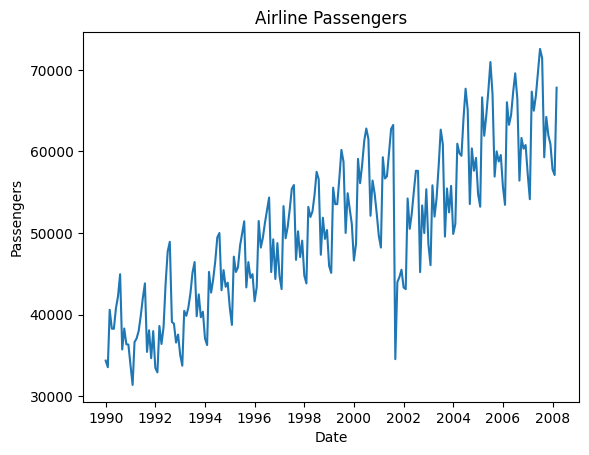

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

from statsforecast import StatsForecast

usair_p=pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/TimeSeries/master/usairlines.csv")
df=pd.date_range(start='1/1/1990', end='3/1/2008', freq='MS')
usair_p.index=pd.to_datetime(df)



plt.plot(usair_p["Passengers"])
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.title("Airline Passengers")
plt.show()

### Seasonal Decomposition

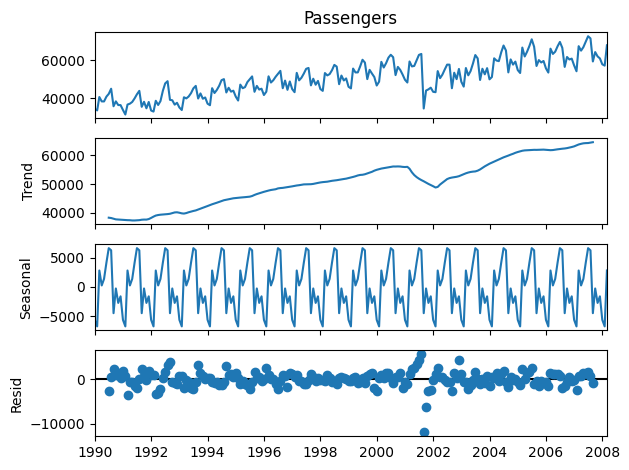

In [98]:
## Classical Decomposition
result = seasonal_decompose(usair_p["Passengers"], model='additive', period=12)
result.plot()
pyplot.show()

### STL Decomposition - get the dataframe in the Shape for Forecasting

In [99]:
from statsforecast.models import MSTL, AutoARIMA
from statsforecast.utils import generate_series

# Assuming 'energy_train' is your historical data with columns 'unique_id', 'ds', and 'y'
# 'ds' is the date column, and 'y' is the value column.

# format for the STL Decomp
d = {'unique_id': 1, 'ds': usair_p.index, 'y': usair_p['Passengers']}
usair_sf = pd.DataFrame(data = d)


In [100]:
dcmp = StatsForecast(models = [MSTL(season_length=12)], freq = 'M')
dcmp.fit(df=usair_sf)

result = dcmp.fitted_[0,0].model_
result

,data,trend,seasonal,remainder
0,34348.0,39019.259582,-4656.824185,-14.435397
1,33536.0,38883.032235,-5824.359162,477.326927
2,40578.0,38749.492861,1252.473058,576.034080
3,38267.0,38618.252549,-554.514256,203.261707
4,38249.0,38488.211906,388.629101,-627.841007
...,...,...,...,...
214,61967.0,64483.390709,-2942.503405,426.112696
215,60907.0,64538.640065,-1897.489966,-1734.150099
216,57800.0,64584.717962,-6231.124988,-553.592974
217,57109.0,64621.674775,-7705.357902,192.683127


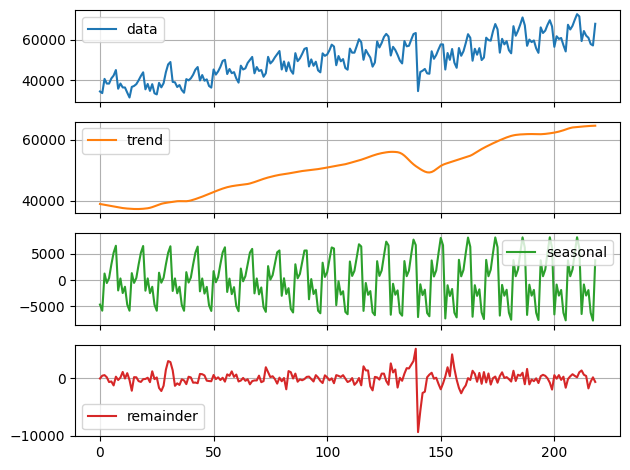

In [101]:
dcmp.fitted_[0, 0].model_.plot(subplots=True, grid=True)
## array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

plt.tight_layout()
plt.show()

### Trend Strength in Python

In [102]:
# work off the result table - print again to take a look at our data
# remember, result is already fitted

result

,data,trend,seasonal,remainder
0,34348.0,39019.259582,-4656.824185,-14.435397
1,33536.0,38883.032235,-5824.359162,477.326927
2,40578.0,38749.492861,1252.473058,576.034080
3,38267.0,38618.252549,-554.514256,203.261707
4,38249.0,38488.211906,388.629101,-627.841007
...,...,...,...,...
214,61967.0,64483.390709,-2942.503405,426.112696
215,60907.0,64538.640065,-1897.489966,-1734.150099
216,57800.0,64584.717962,-6231.124988,-553.592974
217,57109.0,64621.674775,-7705.357902,192.683127


In [103]:

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.remainder
data = result.data  # Original data
t_and_r = trend + residual

# Ensure all series are aligned
if not trend.empty and not residual.empty and not seasonal.empty:
    # Calculate Trend Strength
    var_residual = residual.var()
    var_t_plus_r = t_and_r.var()
    var_detrended = (data - trend).var()

    if var_detrended == 0:
        trend_strength = 0
        print("Trend Strength: 0 (Detrended variance is zero)")
    else:
        trend_strength = 1 - (var_residual / var_t_plus_r)
        trend_strength = max(0, trend_strength)  # Avoid negative strength
        print(f"Trend Strength: {trend_strength:.2f}")

    # Calculate Seasonal Strength
    var_seasonal = seasonal.var()

    if var_detrended == 0:
        seasonal_strength = 0
        print("Seasonal Strength: 0 (Detrended variance is zero)")
    else:
        seasonal_strength = var_seasonal / var_detrended
        seasonal_strength = max(0, seasonal_strength)  # Avoid negative strength
        print(f"Seasonal Strength: {seasonal_strength:.2f}")
else:
    print("Trend, Seasonal, or Residual series is empty or misaligned.")


Trend Strength: 0.98
Seasonal Strength: 0.91


### MSTL vs. STL Decomp Key Differences:
Single vs. Multiple Seasonality:

STL is suitable for time series with one dominant seasonal pattern.
MSTL is designed to handle multiple seasonal patterns simultaneously.
Complexity:

STL is simpler and best used when the time series has a single known seasonal period.
MSTL is more complex and powerful, capable of handling datasets with multiple seasonalities (e.g., daily, weekly, monthly patterns).
Use Case:

STL is typically used in simpler, single-seasonality cases, like monthly sales data with yearly seasonality.
MSTL is used in more complex cases, such as sensor data that may have multiple cyclic patterns, like daily and weekly cycles.
Summary
Use STL when your time series has one clear seasonal cycle.
Use MSTL when your time series has multiple seasonal cycles that need to be decomposed simultaneously.

### Handling Missing Values:
• Mean – uses the mean of the series (not a good 
imputation method for time series data)

• Locf – last observation carried forward (could also do 
Next Observation carried backward…NOCB)

• Spline – uses splines to impute missing values (could also 
use linear, quadratic, etc)

• Seadec – Seasonally decomposed imputation (does a 
decomposition and removes the seasonal component, 
imputes data then puts seasonal component back in)

In [104]:
usair_p.head()

,Year,Month,Passengers
1990-01-01,1990,1,34348
1990-02-01,1990,2,33536
1990-03-01,1990,3,40578
1990-04-01,1990,4,38267
1990-05-01,1990,5,38249


In [105]:
Pass_miss = usair_p.sample(frac=0.9, random_state=42)
Pass_miss = Pass_miss.sort_index()

Pass_miss.head()

,Year,Month,Passengers
1990-01-01,1990,1,34348
1990-03-01,1990,3,40578
1990-04-01,1990,4,38267
1990-05-01,1990,5,38249
1990-06-01,1990,6,40792


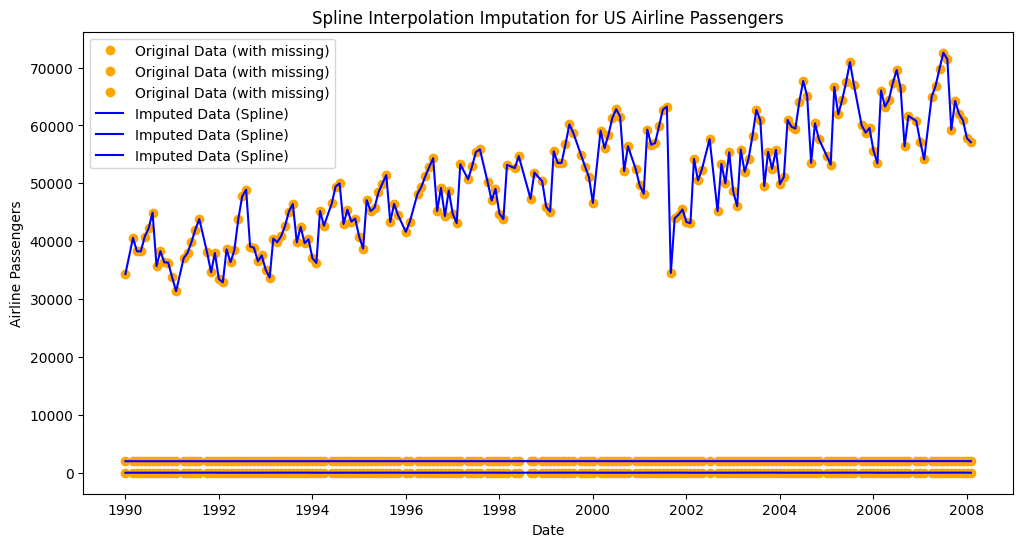

In [106]:
# spline
Pass_impute = Pass_miss.interpolate(method='spline', order=3)

# ploting it
# Plot Imputed Data
plt.figure(figsize=(12, 6))
plt.plot(Pass_miss.index, Pass_miss, label='Original Data (with missing)', color='orange', linestyle='none', marker='o')
plt.plot(Pass_impute.index, Pass_impute, label='Imputed Data (Spline)', color='blue')
plt.title("Spline Interpolation Imputation for US Airline Passengers")
plt.xlabel("Date")
plt.ylabel("Airline Passengers")
plt.legend()
plt.show()

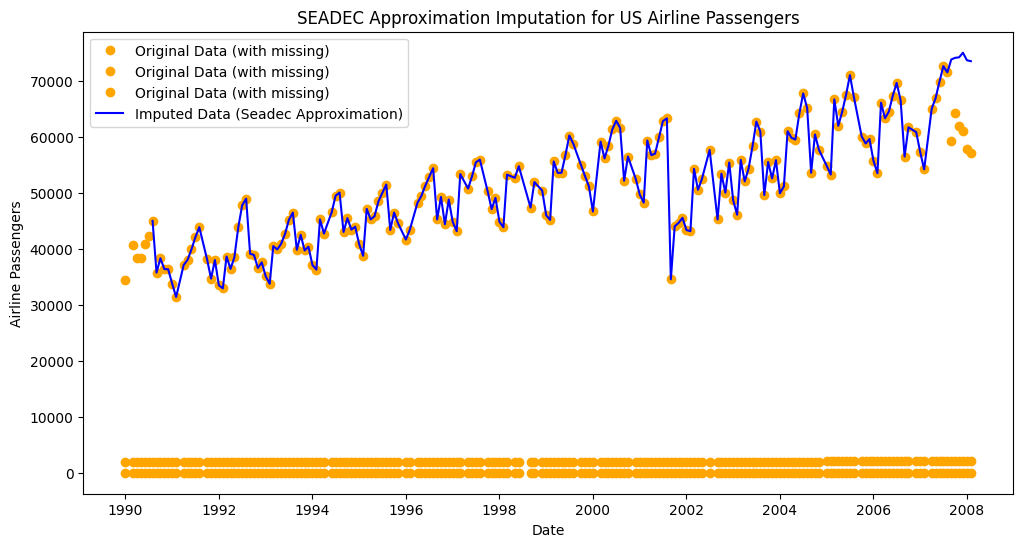

In [107]:
# Seadac
# Decompose the Time Series
decomposition = seasonal_decompose(Pass_miss['Passengers'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Interpolate Missing Values in Each Component
trend_imputed = trend.interpolate(method='linear')
seasonal_imputed = seasonal.interpolate(method='linear')
residual_imputed = residual.interpolate(method='linear')

# Reconstruct the Imputed Series
Pass_impute = trend_imputed + seasonal_imputed + residual_imputed

# Plot the Imputed Data
plt.figure(figsize=(12, 6))
plt.plot(Pass_miss.index, Pass_miss, label='Original Data (with missing)', color='orange', linestyle='none', marker='o')
plt.plot(Pass_impute.index, Pass_impute, label='Imputed Data (Seadec Approximation)', color='blue')
plt.title("SEADEC Approximation Imputation for US Airline Passengers")
plt.xlabel("Date")
plt.ylabel("Airline Passengers")
plt.legend()
plt.show()

## Forecasting

### Exponential Smoothing Models

#### Simple Exponential Smoothing Models

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from statsforecast.models import ETS
from statsforecast import StatsForecast
from statsforecast.utils import AirPassengers
from statsmodels.tsa.tsatools import detrend
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsforecast.models import AutoETS


In [109]:
steel=pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/TimeSeries/master/steel.csv")
df = pd.date_range(start='1932-07-01', end='1980-07-01', freq='6M')
steel.index=pd.to_datetime(df)

In [110]:
steel_train=steel.head(87)
steel_test = steel.tail(9)

steel_train.head()

,steelshp
1932-07-31,5980
1933-01-31,6150
1933-07-31,7240
1934-01-31,6472
1934-07-31,6948


In [111]:

fit = SimpleExpSmoothing(steel_train['steelshp']).fit()
fit.params['smoothing_level']

0.4769767441860465

In [112]:
fcast = fit.forecast(9)
fcast

1976-01-31    6188.807035
1976-07-31    6188.807035
1977-01-31    6188.807035
1977-07-31    6188.807035
1978-01-31    6188.807035
1978-07-31    6188.807035
1979-01-31    6188.807035
1979-07-31    6188.807035
1980-01-31    6188.807035
Freq: 6M, dtype: float64

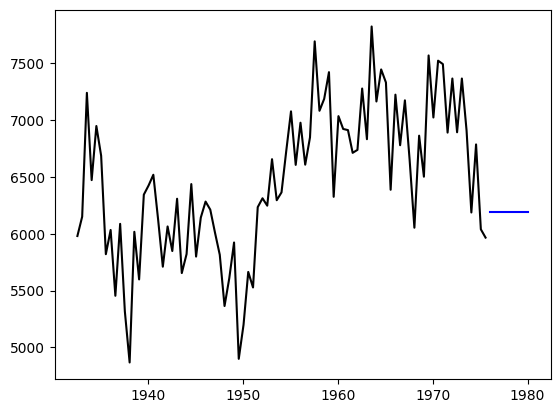

In [113]:
plt.plot(steel_train["steelshp"],color="black")
plt.plot(fcast,color="blue")
plt.show()

In [114]:
##### Using Statsforecast


d = {'unique_id': 1, 'ds': steel.index, 'y': steel['steelshp']}
steel_sf = pd.DataFrame(data = d)

steel_train=steel_sf.head(87)
steel_test = steel_sf.tail(9)

steel_SES = StatsForecast(models = [AutoETS(model=["A","N","N"],  alias="AutoETS", season_length=2)], freq = '6M')
steel_model = steel_SES.fit(df = steel_train)

result = steel_SES.fitted_[0,0].model_['par']
result

array([4.66739272e-01,            nan,            nan,            nan,
       6.27096958e+03])

In [115]:
y_hat1=steel_model.predict(h=9)

/opt/anaconda3/lib/python3.11/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

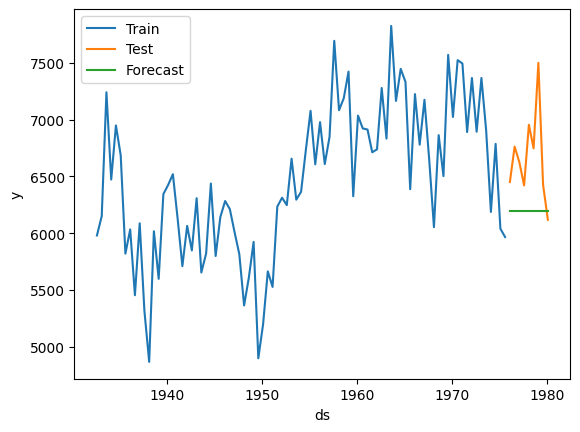

In [116]:
yhat=y_hat1.reset_index(drop=True)
forecast=pd.Series(pd.date_range("1976-01-31", freq="6M", periods=9))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=yhat['AutoETS']
forecast["unique_id"]="1"
sns.lineplot(steel_train,x="ds", y="y", label="Train")
sns.lineplot(steel_test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()

### Holt ESM - ETS components

In [117]:
#### This code uses the new Statsforecast package

### Holt Model

# usair_p=pd.read_csv("Q:\\My Drive\\Fall 2017 - Time Series\\DataR\\usairlines.csv")
# df=pd.date_range(start='1/1/1990', end='3/1/2008', freq='MS')
# usair_p.index=pd.to_datetime(df)


d = {'unique_id': 1, 'ds': usair_p.index, 'y': usair_p['Passengers']}
usair_sf = pd.DataFrame(data = d)

### train has 192 observations
### test has 27 observations

air_train = usair_sf.head(192)
air_test = usair_sf.tail(27)

air_holt = StatsForecast(models = [AutoETS(model=["A","A","N"],  alias="AutoETS", season_length=12)], freq = 'M')
air_model = air_holt.fit(df = air_train)

result = air_holt.fitted_[0,0].model_['par']
result

array([5.69871723e-01, 1.00000000e-04,            nan,            nan,
       3.48788866e+04, 1.29335525e+02])

In [118]:
# build the predictions model, with 27 months as the length of forecast
y_hat1=air_model.predict(h=27)

/opt/anaconda3/lib/python3.11/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

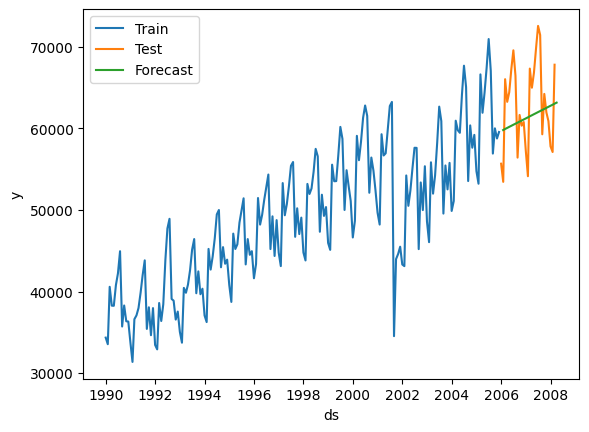

In [119]:
yhat=y_hat1.reset_index(drop=True)

# create a date range as a Pandas series
forecast=pd.Series(pd.date_range("2006-01-01", freq="M", periods=27))

#convert the Series to a DataFrame with a single column. Name the column ds
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]

# add the column from the yhat1 df, called AutoETS, to the forecast df. call it 'hat'
forecast["hat"]=yhat['AutoETS']
forecast["unique_id"]="1"

#plot the results
sns.lineplot(air_train,x="ds", y="y", label="Train")
sns.lineplot(air_test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()

### Damped Trend

In [120]:
### Damped trend


air_holt = StatsForecast(models = [AutoETS(model=["A","A","N"],  damped=True, alias="AutoETS", season_length=12)], freq = 'M')
air_model = air_holt.fit(df = air_train)

result = air_holt.fitted_[0,0].model_['par']
result

array([5.71199778e-01, 1.00000000e-04,            nan, 9.79993121e-01,
       3.46022280e+04, 3.16699140e+02])

In [121]:
y_hat1=air_model.predict(h=27)

/opt/anaconda3/lib/python3.11/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

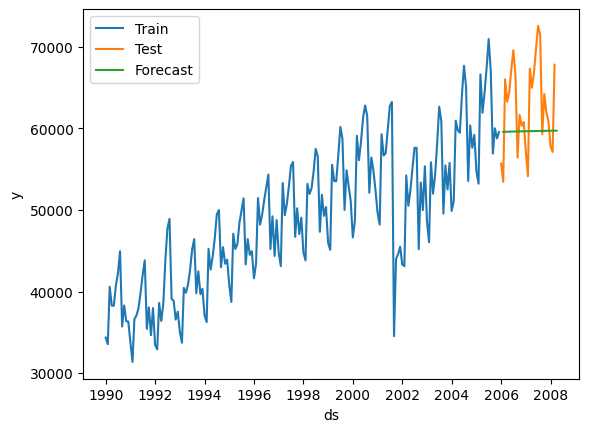

In [122]:
yhat=y_hat1.reset_index(drop=True)
forecast=pd.Series(pd.date_range("2006-01-01", freq="M", periods=27))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=yhat['AutoETS']
forecast["unique_id"]="1"
sns.lineplot(air_train,x="ds", y="y", label="Train")
sns.lineplot(air_test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()

### Holt Winters (Seasonal) Model - Additive Seasonality

In [123]:
###  Using Statsforecast

### Additive Seasonality

# 1. Build the thing
air_holtw = StatsForecast(models = [AutoETS(model=["A","A","A"],  alias="AutoETS", season_length=12)], freq = 'M')

# 2. Fit the thing
air_model = air_holtw.fit(df = air_train)

# Check the array
result = air_holtw.fitted_[0,0].model_['par']
result

array([ 4.81222943e-01,  1.59916114e-02,  2.42485779e-01,  8.90792825e-01,
        3.77019540e+04,  5.67094839e+02, -9.99248746e+02, -2.53068050e+03,
        1.17586756e+03, -2.77023876e+03,  5.79529172e+03,  4.08571477e+03,
        2.44858026e+03, -1.89481694e+02, -5.21476747e+02,  1.96822431e+03,
       -4.80880072e+03, -3.65375146e+03])

In [124]:
# 3. Make Predicitions with the thing. prediction range set by (h=)
y_hat1=air_model.predict(h=27)

/opt/anaconda3/lib/python3.11/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

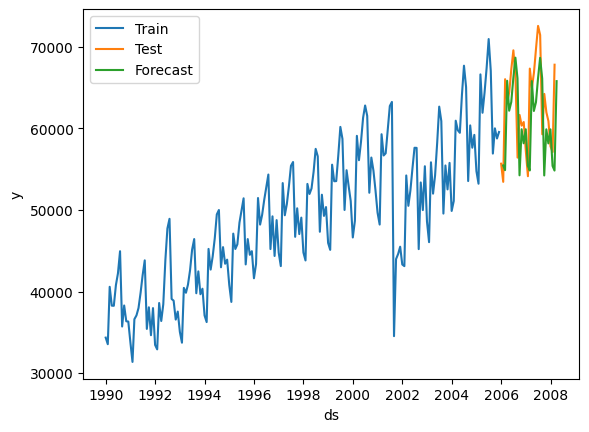

In [125]:
# 4. Build the forecast dataframe, then plot it

yhat=y_hat1.reset_index(drop=True)
forecast=pd.Series(pd.date_range("2006-01-01", freq="M", periods=27))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=yhat['AutoETS']
forecast["unique_id"]="1"
sns.lineplot(air_train,x="ds", y="y", label="Train")
sns.lineplot(air_test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()

### Holt Winters, with Multiplicative Seasonality

In [126]:
air_holtw_m = StatsForecast(models = [AutoETS(model=["M","A","M"], alias="AutoETS", season_length=12)], freq='M')

air_model_m = air_holtw_m.fit(df= air_train)

result_m = air_holtw_m.fitted_[0,0].model_['par']
result_m

array([9.45573068e-02, 2.64219583e-03, 2.54391669e-02,            nan,
       3.72394856e+04, 1.57545432e+02, 9.69302717e-01, 9.46292042e-01,
       9.96735467e-01, 9.23896361e-01, 1.13023141e+00, 1.12016781e+00,
       1.07916358e+00, 1.02341081e+00, 1.00200872e+00, 1.04798340e+00,
       8.69839578e-01, 8.90968112e-01])

In [127]:
y_hat1m = air_model_m.predict(h=27)

/opt/anaconda3/lib/python3.11/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

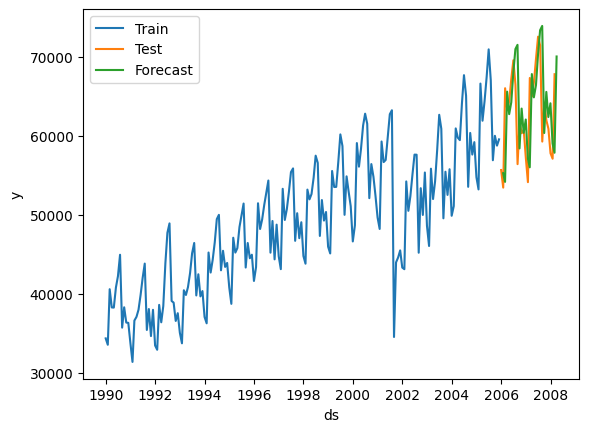

In [128]:
yhat_m = y_hat1m.reset_index(drop=True)

forecast=pd.Series(pd.date_range("2006-01-01", freq="M", periods=27))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=yhat_m['AutoETS']
forecast["unique_id"]="1"

sns.lineplot(air_train,x="ds", y="y", label="Train")
sns.lineplot(air_test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()


### Auto-ETS (don't need to manually decide Additive/Multiplicative)

In [129]:
### AutoETS

air_holtw = StatsForecast(models = [AutoETS(model=["Z","Z","Z"],  alias="AutoETS", season_length=12)], freq = 'M')
air_model = air_holtw.fit(df = air_train)

result = air_holtw.fitted_[0,0].model_['par']
result

array([ 3.53928248e-01,             nan,  2.91330703e-01,             nan,
        3.88348407e+04, -8.30637153e+02, -2.79366612e+03,  3.48960549e+02,
       -1.64504368e+03,  6.41938336e+03,  5.16183884e+03,  2.80318982e+03,
        1.24549104e+02, -1.04962061e+03,  9.50906067e+02, -5.57370399e+03,
       -3.91615619e+03])

In [130]:
y_hat1=air_model.predict(h=27)

/opt/anaconda3/lib/python3.11/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

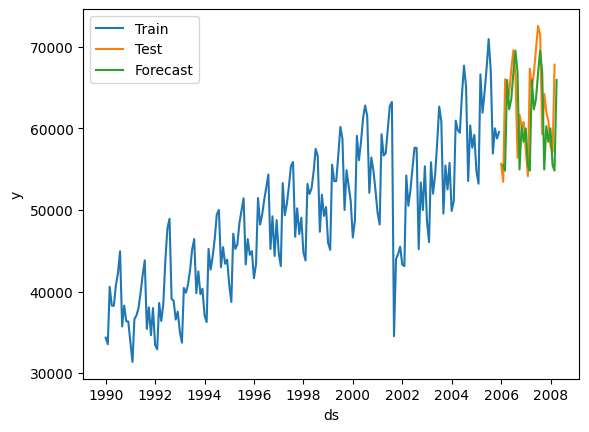

In [131]:
yhat=y_hat1.reset_index(drop=True)
forecast=pd.Series(pd.date_range("2006-01-01", freq="M", periods=27))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=yhat['AutoETS']
forecast["unique_id"]="1"
sns.lineplot(air_train,x="ds", y="y", label="Train")
sns.lineplot(air_test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()

### Model Comparison

In [132]:
### Comparing models:

air_holtw = StatsForecast(models = [AutoETS(model=["A","A","A"], alias = "Additive", season_length=12), 
                                    AutoETS(model=["M","A","M"], alias = "Multiplicative",   season_length=12)], freq = 'M')
air_model = air_holtw.fit(df = air_train)


y_hat1=air_model.predict(h=27)

/opt/anaconda3/lib/python3.11/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [133]:
y_hat1

,ds,Additive,Multiplicative
unique_id,,,
1,2005-12-31,55463.046875,55276.296875
1,2006-01-31,54885.386719,54177.058594
1,2006-02-28,65846.859375,65606.875000
1,2006-03-31,62177.195312,62759.925781
1,2006-04-30,63248.167969,64265.078125
1,2006-05-31,66142.429688,67983.453125
1,2006-06-30,68683.671875,71003.070312
1,2006-07-31,66152.406250,71539.562500
1,2006-08-31,54251.707031,58415.742188


In [134]:
y_hat1=air_model.predict(h=27)

/opt/anaconda3/lib/python3.11/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

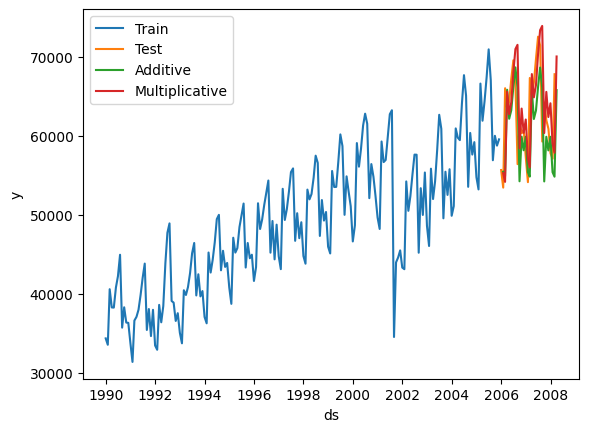

In [135]:
yhat=y_hat1.reset_index(drop=True)
forecast=pd.Series(pd.date_range("2006-01-01", freq="M", periods=27))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat1"]=yhat['Additive']
forecast["hat2"]=yhat['Multiplicative']
forecast["unique_id"]="1"
sns.lineplot(air_train,x="ds", y="y", label="Train")
sns.lineplot(air_test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat1", label="Additive")
sns.lineplot(forecast,x="ds", y="hat2", label="Multiplicative")
plt.show()

### ARIMA

#### For ARIMA we need a few things:

- stationary: underlying constant mean
- underlying constant variance (relationships from day to day are the same)
- constant correlation structure
- beware of random walks!

#### Stationarity

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import DataFrame
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

quotes=pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/TimeSeries/master/fpp_insurance.csv")
df = pd.date_range(start='2002-01-01', end='2005-05-01', freq='M')
quotes.index=pd.to_datetime(df)
y=pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/TimeSeries/master/ar2.csv")
quotes_train = quotes.head(36)
y_train = y.head(731)



- perform a Unit Root Test (ADF or KPSS) to see if we have a Random Walk in the Data. WE NEED TO STRIP EVERYTHING OUT OF THIS DATA!
- for Augmented Dickey Fuller (ADF):

• H0
: There exists a unit root (i.e. Random Walk) 

• HA
: The series is stationary

In [137]:
result=adfuller(quotes_train["Quotes"])
print(f'ADF p-value: {result[1]}')

ADF p-value: 0.04236093395330489


- there's no unit root, p< 0.05 (or whatever threshold is set, 0.05 is good enough here.)
- if that's not the caase, we will take the difference (1st difference between observations)

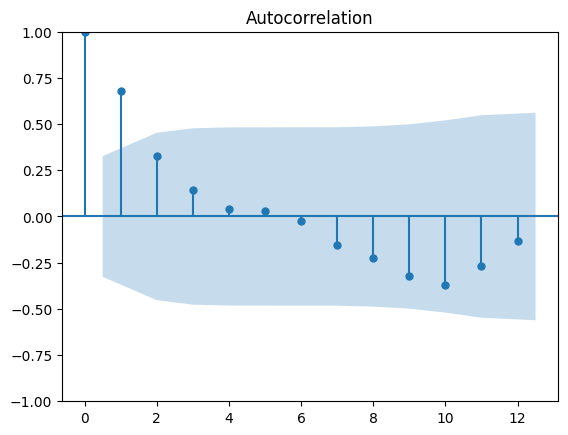

In [138]:
plot_acf(quotes_train["Quotes"],lags=12)
pyplot.show()

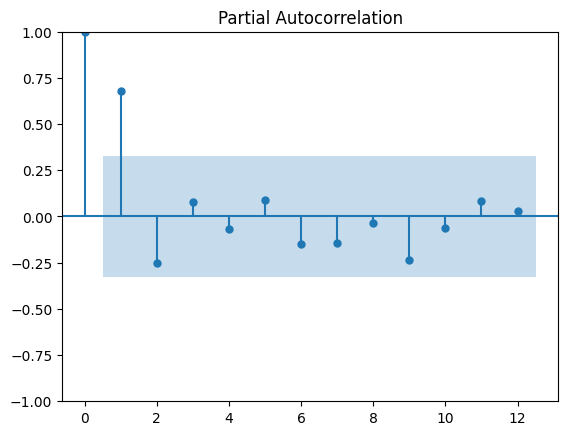

In [139]:
plot_pacf(quotes_train["Quotes"],lags=12)
pyplot.show()

In [140]:
### Using statsmodel...the older way of doing this..

model = ARIMA(y_train, order=(2,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  731
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2696.123
Date:                Thu, 05 Sep 2024   AIC                           5400.247
Time:                        10:33:00   BIC                           5418.625
Sample:                             0   HQIC                          5407.337
                                - 731                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0960      0.481     -0.199      0.842      -1.039       0.847
ar.L1          0.6398      0.036     17.605      0.000       0.569       0.711
ar.L2         -0.3838      0.035    -11.007      0.0

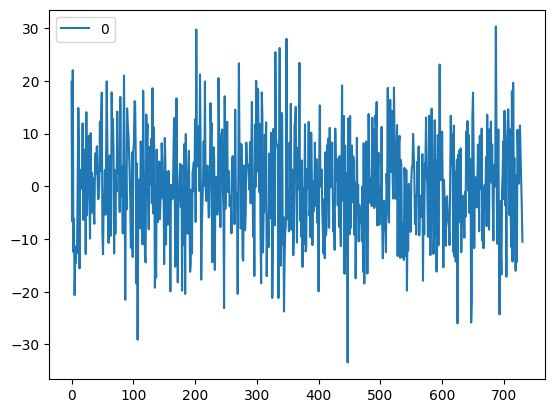

In [141]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

In [142]:
print(residuals.describe())

                0
count  731.000000
mean     0.001103
std      9.685433
min    -33.427139
25%     -6.456285
50%      0.257085
75%      6.333976
max     30.312938


### Note the spike at 0 for the charts below: it is at 0 and shows 100% correlation with itself. This doesn't go away, and doesn't need to, this chart has achieved a White Noise level.

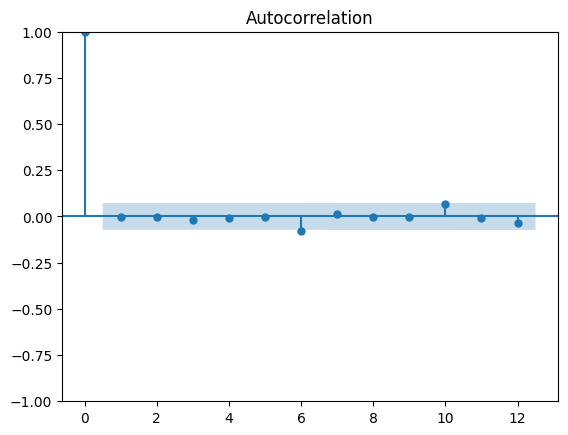

In [143]:
plot_acf(residuals,lags=12)
pyplot.show()

### Note: for fitting the AR term, look for the last value of the PACF spike. That is the term you will add for your AR value (number of y periods we need to model)

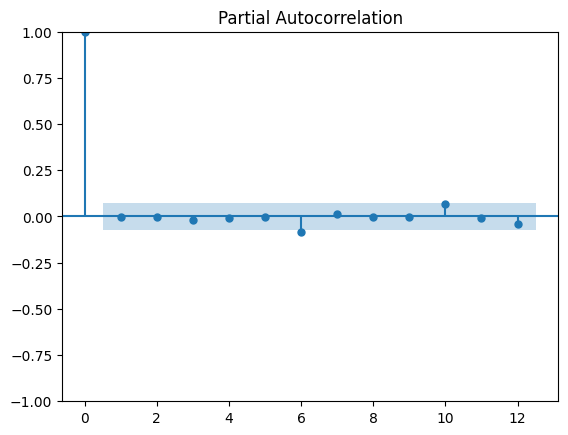

In [144]:
plot_pacf(residuals,lags=12)
pyplot.show()

### Check if we need to Difference

In [145]:
from pmdarima.arima import ndiffs

hurr = pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/TimeSeries/master/hurrican.csv")
hurr2 = hurr.dropna(axis=0)
hurricane_train =hurr2.head(149)
hurricane_train

,Date,Hurricanes,MinVMax,MaxVMax,MeanVMax,Year
0,1851,3,80.0,100.0,86.7,1851
1,1852,5,70.0,100.0,82.0,1852
2,1853,4,70.0,130.0,97.5,1853
3,1854,3,70.0,110.0,90.0,1854
4,1855,4,70.0,110.0,90.0,1855
...,...,...,...,...,...,...
146,1997,3,65.0,110.0,81.7,1997
147,1998,10,65.0,155.0,96.5,1998
148,1999,8,85.0,135.0,114.4,1999
149,2000,8,70.0,120.0,91.3,2000


In [146]:
n_diffs = ndiffs(hurricane_train["MeanVMax"])
print(n_diffs)

1


In [147]:
import statsmodels.stats.diagnostic as diag


model = ARIMA(y_train, order=(2,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  731
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2696.123
Date:                Thu, 05 Sep 2024   AIC                           5400.247
Time:                        10:33:00   BIC                           5418.625
Sample:                             0   HQIC                          5407.337
                                - 731                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0960      0.481     -0.199      0.842      -1.039       0.847
ar.L1          0.6398      0.036     17.605      0.000       0.569       0.711
ar.L2         -0.3838      0.035    -11.007      0.0

In [148]:
# Perform the Ljung-Box test
lb_test = diag.acorr_ljungbox(model_fit.resid, lags=[10], model_df=2)
print(lb_test)

     lb_stat  lb_pvalue
10  8.542081   0.382384


### Fitting the ARIMA models

In [149]:
## Fit AR(2) model to AR2 data set

from statsforecast import StatsForecast
from statsforecast.models import ARIMA

y=pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/TimeSeries/master/ar2.csv")
df = pd.date_range(start='2000-01-01', end='2002-09-26', freq='D')
y.index=pd.to_datetime(df)

d = {'unique_id': 1, 'ds': y.index, 'y': y['Y']}
y_sf = pd.DataFrame(data = d)
y_train = y_sf.head(731)
y_test = y_sf.tail(69)



model_SD_ARIMA = StatsForecast(models = [ARIMA(order=(2, 0, 0),season_length=12)], freq = 'D')
model_SD_ARIMA.fit(df = y_train)

StatsForecast(models=[ARIMA])

#### ARIMA part 1: Auto-Regressive Modeling
- current value of Y, with a lag value
- essentially, mdoeling the Y's we know with their past values
- Fi: the AR coefficient
- so: the relationship between t and t-1

### Moving Average Models

## Time Series 2

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
pass_df = pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/TimeSeries/master/usairlines.csv")
pass_df.head(5)

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [5]:
pass_df['ym'] = concatenate(pass_df['Year'], "-", pass_df['Month'])
pass_df.head(5)

TypeError: concat() takes 1 positional argument but 3 were given

In [ ]:
plt.plot(data = pass_df, x)